In [19]:
import numpy as np
from tensorflow.keras.layers import Input, Dense, Reshape
from tensorflow.keras.models import Model
import json
import matplotlib.pyplot as plt
from PIL import Image

In [20]:
def display_level_image(tile_dim, level, tile_name_to_image):
    level_image = Image.new("RGB", (tile_dim[1] * len(level[0]), tile_dim[1] * len(level) ))
    for row in range(len(level)):
        for col in range(len(level[0])):
            level_image.paste(tile_name_to_image[level[row][col]],(col * tile_dim[0], row * tile_dim[1], (col+1) * tile_dim[0], (row +1) *tile_dim[1]))
    
    plt.figure()
    plt.imshow(level_image)
    plt.show()

def translate_level(level):
    reverse_embedding_map = ["A","B","C","G","K"]
    
    for row in range(len(level)):
        for col in range(len(level[0])):
            level[row][col] = reverse_embedding_map[level[row][col]]

    return level

tile_name_to_image = {}
tiles = ["A", "B", "C", "G", "K"]
for tile in tiles:
    tile_name_to_image[tile] = Image.open(f'tiles/{tile}.png')
    
tile_dim = tile_name_to_image["A"].size

# Create Autoencoder

In [21]:
embedding_map = {
    "A": 0,
    "B": 1,
    "C": 2,
    "G": 3,
    "K": 4
}

levels = []
for i in range(16):
    with open(f"generated_levels/{i}.json", 'r') as file:
        level = json.load(file)
        for row in range(len(level)):
            for col in range(len(level[0])):
                level[row][col] = embedding_map[level[row][col]]
        levels.append(level)

X = np.array(levels).reshape(len(levels), -1)
print(X)
print(X.shape)

[[0 0 0 ... 2 0 2]
 [0 0 0 ... 4 2 4]
 [0 0 0 ... 4 0 4]
 ...
 [0 0 0 ... 2 4 4]
 [0 0 0 ... 4 2 2]
 [0 0 0 ... 2 2 4]]
(16, 136)


In [22]:
inputLevel = Input(shape=(X.shape[1],))
encoded = Dense(128, activation='relu')(inputLevel)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
encoded = Dense(16, activation='relu')(encoded)
encoded = Dense(8, activation='relu')(encoded)

decoded = Dense(16, activation='relu')(encoded)
decoded = Dense(32, activation='relu')(decoded)
decoded = Dense(64, activation='relu')(decoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(X.shape[1] * 5, activation='softmax')(decoded)
decoded = Reshape((X.shape[1], 5))(decoded)

autoencoder = Model(inputLevel, decoded)

autoencoder.compile(optimizer='adam', loss='sparse_categorical_crossentropy')

autoencoder.fit(X, X, epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 1.6096
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 1.6008
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 1.5866
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 1.5641
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 1.5316
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 1.4867
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 1.4270
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - loss: 1.3492
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step - loss: 1.2529
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - loss: 1.1382
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 1.0093
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.8733
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.7425
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - loss: 0.6347
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step - loss: 0.5646
Epoch 16/500
1/1 ━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
[['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'], ['A', 'A', 'A', 'A', 'A', 'B', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'], ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A'], ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'C', 'A', 'A', 'A', 'A', 'A', 'B'], ['A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'A', 'K', 'A', 'A', 'A', 'A', 'A', 'A'], ['A', 'A', 'C', 'A', 'A', 'C', 'C', 'A', 'A', 'C', 'K', 'A', 'A', 'A', 'A', 'A', 'A'], ['C', 'C', 'K', 'A', 'C', 'K', 'K', 'C', 'C', 'K', 'K', 'A', 'C', 'C', 'A', 'A', 'A'], ['K', 'K', 'K', 'C', 'K', 'K', 'K', 'K', 'K', 'K', 'K', 'A', 'K', 'K', 'C', 'A', 'C']]


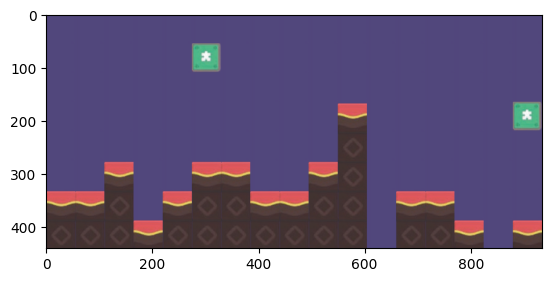

In [23]:
gen =  autoencoder.predict(np.array(levels[0]).reshape(1, 8*17))[0]
rows = 8
cols = 17

out_level = []
for row in range(rows):
    level_row = []
    for col in range(cols):
        content_pred = np.argmax(gen[row * cols + col])
        level_row.append(content_pred)
    out_level.append(level_row)

out_level = translate_level(out_level)
print(out_level)
display_level_image(tile_dim, out_level, tile_name_to_image)

[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 0, 0, 0], [0, 0, 2, 0, 0, 2, 2, 0, 0, 2, 4, 0, 0, 0, 0, 0, 0], [2, 2, 4, 0, 2, 4, 4, 2, 2, 4, 4, 0, 2, 2, 0, 0, 0], [4, 4, 4, 2, 4, 4, 4, 4, 4, 4, 4, 0, 4, 4, 2, 0, 2]]


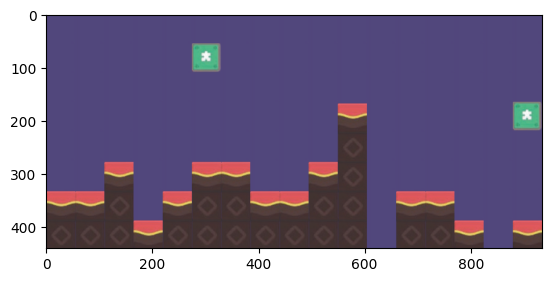

In [24]:
source_level = [[element for element in row] for row in levels[0]]
print(source_level)
display_level_image(tile_dim, translate_level(source_level), tile_name_to_image)

# Latent Space

In [25]:
encoded_input = Input(shape=(8,))
decoder_layer = autoencoder.layers[-6](encoded_input)
decoder_layer = autoencoder.layers[-5](decoder_layer)
decoder_layer = autoencoder.layers[-4](decoder_layer)
decoder_layer = autoencoder.layers[-3](decoder_layer)
decoder_layer = autoencoder.layers[-2](decoder_layer)
decoder_layer = autoencoder.layers[-1](decoder_layer)
decoder = Model(encoded_input, decoder_layer)

encoder = Model(inputLevel, encoded)

In [66]:
vector_one = encoder.predict(np.array(levels[0]).reshape(1, 8*17))[0]
vector_two = encoder.predict(np.array(levels[1]).reshape(1, 8*17))[0]

a = 0.0
vector = [vector_one[i] * a + vector_two[i] * (1-a) for i in range(8)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


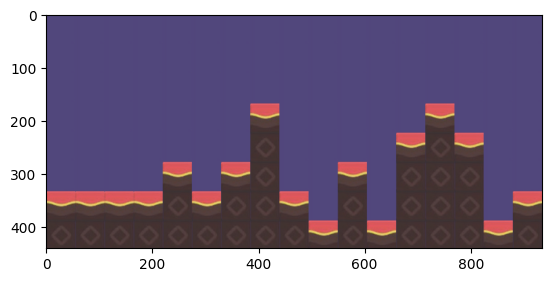

In [67]:
gen = decoder.predict(np.array(vector).reshape(1,8))[0]

rows = 8
cols = 17

out_level = []
for row in range(rows):
    level_row = []
    for col in range(cols):
        content_pred = np.argmax(gen[row * cols + col])
        level_row.append(content_pred)
    out_level.append(level_row)

result_level = translate_level(out_level)
display_level_image(tile_dim, result_level, tile_name_to_image)